In [2]:
# 데이터 다루기
# 훈련 세트, 테스트 세트 만들기
# 35 - 도미, 14 - 방어
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [6]:
#전체 데이터
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14 # 지도 학습 정답이 있는

In [7]:
# 훈련 세트  - 학습용 데이터
train_input = fish_data[:35] # 35개 훈련 데이터
train_target = fish_target[:35] # 35개의 정답 데이터

# 테스트 세트 - 정확도 측정용 데이터
test_input = fish_data[35:] # 14개의 테스트 데이터
test_target = fish_target[35:] # 14개의 정답 데이터

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
kn = KNeighborsClassifier()

In [10]:
# 학습 - 학습 세트
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [13]:
# 분류 정확도  - 테스트 세트
kn.score(test_input, test_target) # 하나도 못 맞춘 이유는 뭘 까

0.0

In [17]:
import numpy as np # 별칭 np
_train_input = np.array(train_input) # 학습 세트 데이터 - > 넘파이 배열
_test_input = np.array(test_input)
#print(_train_input)

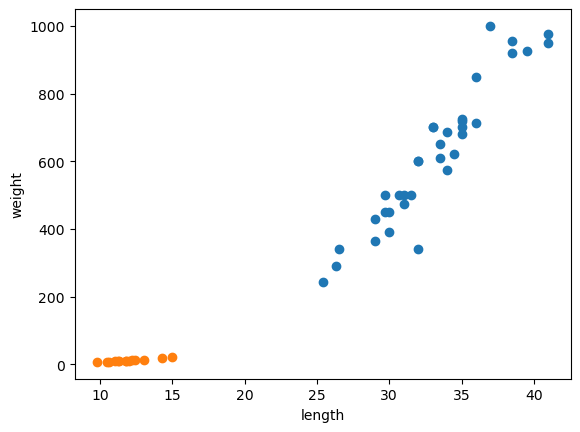

In [20]:
import matplotlib.pyplot as plt
plt.scatter(_train_input[:,0],_train_input[:,1])
#                         _trtrain_input 각 행의 첫번째 열
plt.scatter(_test_input[:, 0], _test_input[:, 1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show() # 주황 테스트 , 파랑 학습 
# 이렇게 다 따로 나와서 하나도 못 맞춤 예측 실패~ 방어 데이터는 예측 
# 학습은 도미로 해가지구 => 샘플링편향

In [22]:
# 두 번째 머신러닝 프로그램
# 샘플링 편향을 방지하기 위한 방법
index = np.arange(49)
np.random.shuffle(index)
print(index)

[ 1 35 26 34 38 15 24  8  5  7 42 19 41 14 27  6 20 30  4 28  0 48 45 23
 47 13 44 25 40 16 39 31 36 21 43 10 22  3 18 37 46 29 12 11  2 17 33 32
  9]


In [25]:
input_data = np.array(fish_data)
print(input_data.shape) # 배열 몇행 몇열인지 확인 가능
target_data = np.array(fish_target)
print(target_data)

(49, 2)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
input_data[[1,2,3, 10]] # 넘파이 배열, 인덱스 번호 배열로 추출 

array([[ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 31. , 475. ]])

In [32]:
# 학습 세트 
train_input = input_data[index[:35]]
train_target = target_data[index[:35]]
# print(train_target)

[1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [33]:
# 테스트 세트
test_input = input_data[index[35:]]
test_target = target_data[index[35:]]

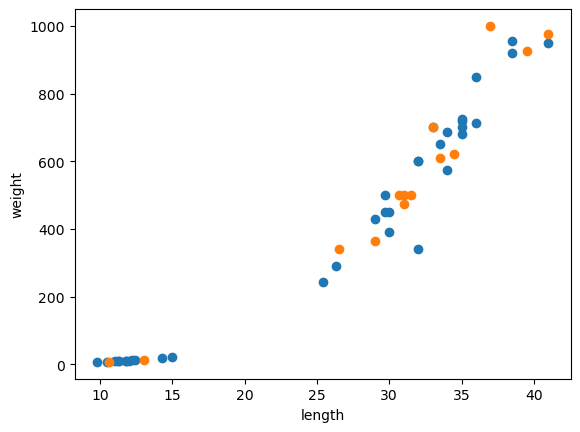

In [35]:
plt.scatter(train_input[:,0], train_input[:,1]) # 학습 데이터
plt.scatter(test_input[:,0], test_input[:, 1]) # 테스트 데이터
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [36]:
kn.fit(train_input, train_target) # 학습 세트로 훈련

KNeighborsClassifier()

In [37]:
kn.score(test_input, test_target)

1.0

In [38]:
kn.predict(test_input)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
test_target

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])